In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from datetime import datetime

In [2]:
df = pd.read_excel('data/b30 stats.xlsx')
df.head()

,date,datenormal,date_gap,disp,flags,lat,lon,mask,size,vel_angle,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,2012145.0,2012-05-24,0.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012146.0,2012-05-25,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012147.0,2012-05-26,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012148.0,2012-05-27,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012149.0,2012-05-28,1.0,0.0,13.0,-74.769,-107.356,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[df["Area km2"].isnull() == False]

### Convert iceberg freeboard to thickness

$h_i = \frac{\rho_w}{\rho_w-\rho_i}h_{ice}$

Density of sea water = 1025
Density of ice = 917

In [4]:
thickness = (1025/(1025-917))*45
df['volume'] = df['Area km2'] * thickness / 1000

In [5]:
df.head()

,date,datenormal,date_gap,disp,flags,lat,lon,mask,size,vel_angle,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,volume
93,2012250.0,2012-09-06,1.0,3.597,13.0,-74.659,-107.154,0.0,10.00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1311.444792
98,2012255.0,2012-09-11,1.0,5.876,13.0,-74.578,-106.981,0.0,10.00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,853.440625
165,2012324.0,2012-11-19,1.0,2.766,15.0,-73.677,-107.688,1.0,1266.26,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684.272917
227,2013020.0,2013-01-20,1.0,4.015,14.0,-73.020,-109.004,1.0,906.89,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,657.110417
306,2013099.0,2013-04-09,1.0,6.141,13.0,-72.291,-112.482,0.0,10.00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649.508333


In [6]:
max(df['datenormal'])

Timestamp('2019-04-27 00:00:00')

-3.077206467320612e-15 4960.058592782768


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


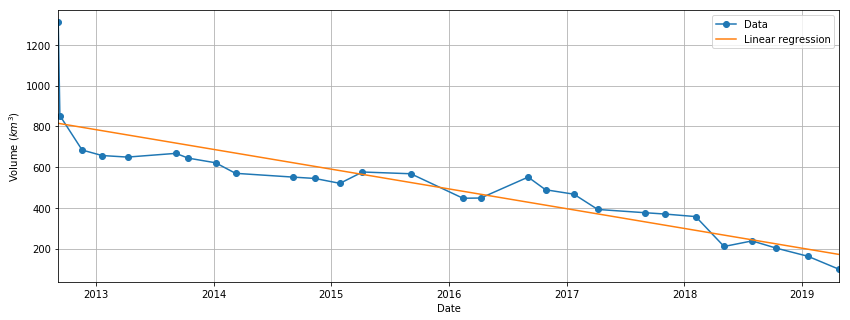

In [7]:
xnum = df['datenormal'].view('int64').values
x = df['datenormal'].values
y = df['volume'].values

m, b = np.polyfit(xnum, y, 1)

print(m, b)

plt.figure(figsize=(14, 5))
plt.plot(x, y, '-o', x, m*xnum+b)
plt.xlabel('Date')
plt.ylabel('Volume ($km^3$)')
plt.xlim(min(df['datenormal']), max(df['datenormal']))
plt.legend(['Data', 'Linear regression'])
plt.grid()

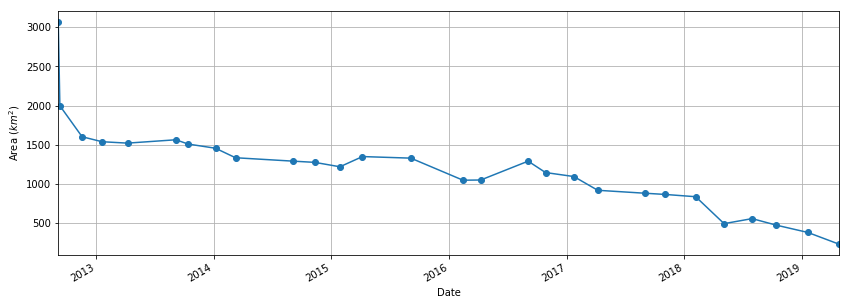

In [8]:
df.plot(x = 'datenormal', y = 'Area km2', figsize=(14,5), legend=None, marker='o')
plt.xlabel('Date')
plt.ylabel('Area ($km^2$)')
plt.grid()

In [10]:
maxvol = df['volume'].max()
minvol = df['volume'].min()
maxvol - minvol / 9

1300.6158564814814